In [2]:
import pandas as pd
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
output_data = pd.read_csv('/content/sample_submission.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train_data.shape,test_data.shape)

(42000, 785) (28000, 784)


In [6]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
train_data.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [8]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [9]:
test_data.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [10]:
x = train_data.drop(columns=['label'])
y = train_data['label']

In [11]:
y.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


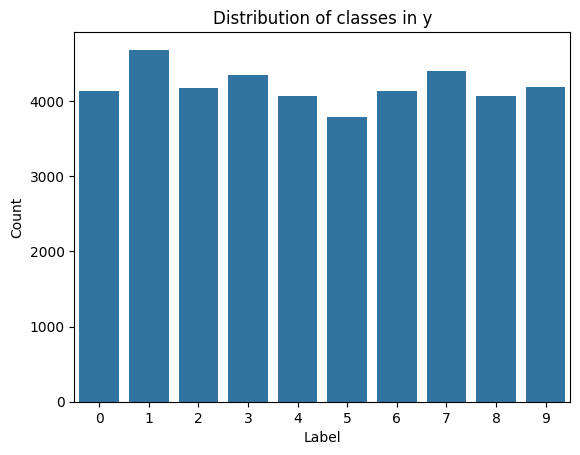

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of classes in y')
plt.show()

In [13]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


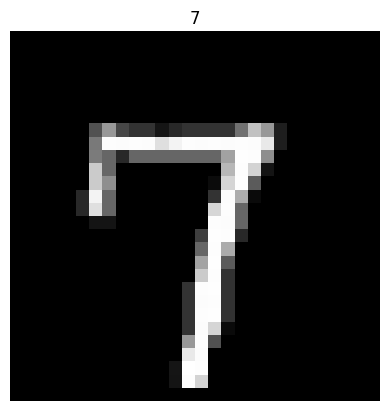

In [14]:
img = x.iloc[6].to_numpy()
img = img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train_data.iloc[6,0])
plt.axis('off')
plt.show()

In [ ]:
# x = x/255.0
# test_data = test_data/255.0

In [17]:
x_train = x.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
print(x_train.shape)
print(test_data.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [15]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,10)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y,test_size=0.2,random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [21]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
cnn = Sequential()
input_shape = (28, 28, 1)

# Layer One
cnn.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(strides=(2,2),padding='valid'))
cnn.add(Dropout(0.25))

# Layers
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(strides=(2,2),padding='valid'))
cnn.add(Dropout(0.25))

# Utility Layer
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

In [22]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         410,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420,234 (1.60 MB)

 Trainable params: 420,138 (1.60 MB)

 Non-trainable params: 96 (384.00 B)

In [23]:
from tensorflow.keras.optimizers import Adam
cnn.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                           zoom_range = 0.1,
                           height_shift_range = 0.1,
                           width_shift_range = 0.1,
                           rotation_range = 10
                            )

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3)

history = cnn.fit(datagen.flow(x_train, y_train, batch_size=50),
                             epochs=10,
                             verbose=2,
                             validation_data=(x_test,y_test),
                             callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


672/672 - 19s - 29ms/step - accuracy: 0.8501 - loss: 0.4815 - val_accuracy: 0.9781 - val_loss: 0.0730
Epoch 2/10
672/672 - 11s - 16ms/step - accuracy: 0.9424 - loss: 0.1849 - val_accuracy: 0.9837 - val_loss: 0.0523
Epoch 3/10
672/672 - 21s - 31ms/step - accuracy: 0.9514 - loss: 0.1503 - val_accuracy: 0.9830 - val_loss: 0.0509
Epoch 4/10
672/672 - 11s - 16ms/step - accuracy: 0.9594 - loss: 0.1326 - val_accuracy: 0.9867 - val_loss: 0.0410
Epoch 5/10
672/672 - 21s - 31ms/step - accuracy: 0.9647 - loss: 0.1148 - val_accuracy: 0.9868 - val_loss: 0.0402
Epoch 6/10
672/672 - 11s - 16ms/step - accuracy: 0.9646 - loss: 0.1131 - val_accuracy: 0.9871 - val_loss: 0.0395
Epoch 7/10
672/672 - 20s - 29ms/step - accuracy: 0.9696 - loss: 0.1024 - val_accuracy: 0.9867 - val_loss: 0.0415
Epoch 8/10
672/672 - 10s - 15ms/step - accuracy: 0.9688 - loss: 0.1010 - val_accuracy: 0.9890 - val_loss: 0.0367
Epoch 9/10
672/672 - 11s - 16ms/step - accuracy: 0.9710 - loss: 0.0964 - val_accuracy: 0.9880 - val_loss: 0

In [26]:
y_pred = cnn.predict(x_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [27]:
import numpy as np
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test_labels,y_pred_labels)

In [29]:
print('accuracy_score:',accuracy_score)

accuracy_score: 0.9867857142857143


In [30]:
y_pred2 = cnn.predict(test_data)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [31]:
y_pred2

array([[1.85832216e-09, 1.25593447e-09, 9.99996305e-01, ...,
        1.07282332e-07, 2.50505323e-08, 1.11784505e-11],
       [9.99972463e-01, 7.97269750e-10, 3.44996874e-06, ...,
        7.03125647e-09, 5.28890723e-07, 1.01111482e-05],
       [5.59430768e-09, 2.23332375e-09, 1.73329283e-06, ...,
        6.67799839e-07, 2.59870612e-05, 9.99967694e-01],
       ...,
       [1.29845618e-17, 3.46547227e-12, 2.35529565e-12, ...,
        4.06106193e-13, 2.92855258e-12, 1.22457735e-13],
       [1.68757160e-05, 3.54810169e-07, 3.29703544e-05, ...,
        3.67892280e-05, 1.81915912e-05, 9.99395251e-01],
       [1.70177316e-12, 1.14387610e-10, 9.99999642e-01, ...,
        1.55108715e-09, 3.18768052e-08, 2.22620303e-13]], dtype=float32)

In [32]:
y_test_labels2 = np.argmax(y_pred2, axis=1)


In [33]:
y_test_labels2

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
test_ids=range(1,28001)

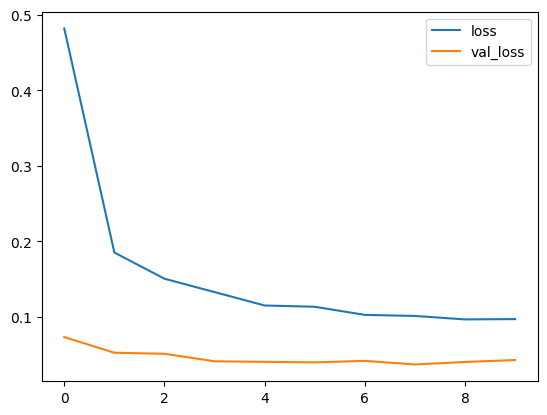

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

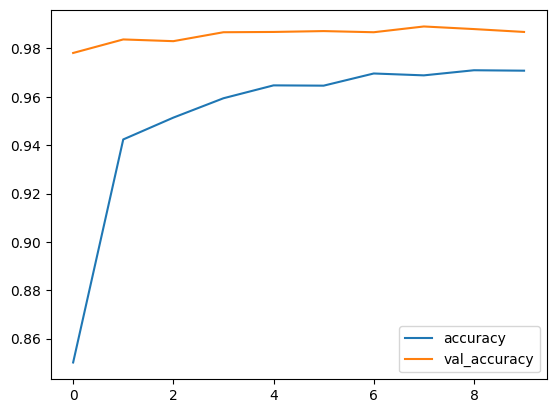

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [37]:
import pandas as pd
submission = pd.DataFrame({
    'ImageId': test_ids,  # Replace with the IDs of the test samples
    'Label': y_test_labels2  # Replace with the predicted labels
})
submission.to_csv('submission.csv', index=False)

In [38]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [39]:
d=pd.read_csv('/content/submission.csv')

In [40]:
d

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
